This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [9]:
import tensorflow
#load tensorflow module
#AJOUT 

In [10]:
tensorflow.keras.datasets.mnist.load_data?
#q°mark is to see characteristic of f°
#AJOUT

In [11]:
(train_images, train_labels), (test_images, test_labels) = tensorflow.keras.datasets.mnist.load_data()
#ouput = loading data
#same as lines 4&6
#AJOUT

11501568/11490434 [==============================] - 0s 0us/step


In [12]:
from tensorflow.keras.datasets import mnist 
#like importing from a library, mnist is a dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
#this is how we load dataset.
#same as line 3&6

In [13]:
import tensorflow as tf
#renommer tensorflow module pour un nom plus court
#AJOUT

In [14]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
#same as lines 3&4
#AJOUT

**We are now gonna check the data "*train_images*" "*train_labels*" "*test_images*" "*test_labels*"**

In [15]:
train_images
#see this data
#AJOUT

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [16]:
train_images.shape
#Check the shape of the data
#we have 60000 number of datasets for each one it's 28x28 fixers

(60000, 28, 28)

In [17]:
len(train_labels)
#Lengh of train_labels is 60000

60000

In [18]:
train_labels
#see the data
#sequence of numbers

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
test_images.shape
#for the test set we have 10000 observations 

(10000, 28, 28)

In [20]:
len(test_labels)
#lengh of test_labels is 10000

10000

In [21]:
test_labels
#see the data 

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

**First newark network example ***

In [22]:
from tensorflow import keras
from tensorflow.keras import layers #we define our model using layers from tf keras
#to import the dense layers, we need to import layers defined from the keras
model = keras.Sequential([
#using sequential layer design we can define the model sequentially
    layers.Dense(512, activation="relu"),
#dimension of layer 1 is "512" the activation f° sigma is "relu"
    layers.Dense(10, activation="softmax")
])

**The compilation step**

In [23]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#optimizer=mechanism through which the network will update itself based on the data it sees and its loss function
#loss f°=how the network measure its performance
#metrics to monitor during training and testing = accuracy

#at the training stage we are monitoring this metric value to see if it increases or decreases

**Preparing the image data**

In [24]:
train_images[0].shape
#look at the dim of the first data set of train_images (0)
#its (28,28)

(28, 28)

In [25]:
#we would like to change this dimension w/ 2 element for just dimension w/ just 1 element. 
train_images = train_images.reshape((60000, 28 * 28))

In [26]:
train_images[0].shape
#now the dim is (784,)

(784,)

In [27]:
#As a result the shape of the all training images become (60000, 784)
train_images.shape

(60000, 784)

In [28]:
#Now let's take a look again at the first train data
train_images[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [29]:
#to normalize the values of the first training data (which are from 0 to 255 we divide by 255)
train_images = train_images.astype("float32") / 255

In [30]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [31]:
#we want to rescale the values from [0,255] to [0,1] so we divide by 255

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

**"Fitting" the model**

In [32]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)
#epochs=5 means we are using the training data 5 times
#batch_size means every iterations of the training we are using 128 batch size. 

#in the first round we have 60000 number of obs°
#60000/128 (betch_size) = number of updates. 

#we proceed the training procedure using the previously defined mdoel with 2 layers. 

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 1.4775 - accuracy: 0.6565
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5885 - accuracy: 0.8533
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.4119 - accuracy: 0.8881
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3537 - accuracy: 0.9002
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3240 - accuracy: 0.9082


In [33]:
#Finally we check the summary after this training
#The first dense layer output is 512 and there are 401920 values
#number of weight parameters inside of the W1 matrix and b1 matrix is 401920
#the W1 matrix is 784x512
#dim of b1 is 512
#W1X+b1 = 784x512+512
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**Using the model to make predictions**

In [34]:
test_images.shape
#we have 10000 of test_images

(10000, 784)

In [35]:
test_digits = test_images[0:10] #we take the first 10

In [36]:
#then we run this previous code to obtain the result (10, 784)
test_digits.shape

(10, 784)

In [37]:
test_digits = test_images[0:10] #we take the first 10
predictions = model.predict(test_digits) #we predicted the model for the first 10
predictions[0] #we check the first prediction 

#as we can see the largest value is the prediction 7

array([3.2278109e-05, 3.6907061e-08, 2.0608992e-05, 3.9795268e-04,
       1.3428578e-06, 1.7372875e-05, 8.3516891e-09, 9.9829000e-01,
       4.5921465e-06, 1.2358070e-03], dtype=float32)

In [38]:
# the prediction '7' has the largest value
predictions[0].argmax()

7

In [39]:
#the preduction value of 7 is '0.997365'
predictions[0][7]

0.99829

In [40]:
test_labels[0]
#the prediction and value are both equal to '7' so we made a right prediction

7

**Evaluating the model on new data**

In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print(f"test_acc: {test_acc}")
#evaluate the model by comapring test_labels and the predicted value.  
#with the model.evaluate we feed the X= test_images and Y = test_labels for the test set and we get the evaluation score = test accuracy = 0.9767

313/313 [==============================] - 1s 3ms/step - loss: 0.3035 - accuracy: 0.9125
test_acc: 0.9125000238418579


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### Vectors (rank-1 tensors)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### Matrices (rank-2 tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

### Key attributes

In [42]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.ndim

3

In [43]:
train_images.shape

(60000, 28, 28)

In [44]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

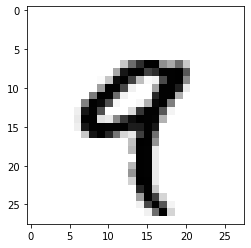

In [45]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [46]:
train_labels[4]

9

### Manipulating tensors in NumPy

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[:, 14:, 14:]

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]

### The notion of data batches

In [ ]:
batch = train_images[:128]

In [ ]:
batch = train_images[128:256]

In [ ]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.36 s


### Broadcasting

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [47]:
import tensorflow as tf
x = tf.Variable(0.) #initiate a scalar variable with an initial value of 0
with tf.GradientTape() as tape: #open a GradientTape scope
    y = 2 * x + 3 #inside the scope apply some tensor operations to our variable
grad_of_y_wrt_x = tape.gradient(y, x) #use the tape to retrieve the gradient of the ouput y wrt our var x

In [48]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [50]:
x = tf.Variable(tf.random.uniform((2, 2))) #initiate a var with shape (2,2) and an initial value of all zeros
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x) #grad_of_y_wrt_x is a tensor of shape (2,2) (like x) describing the curvature of y=2*a+3 arund x=[[0,0],[0,0]]

In [51]:
grad_of_y_wrt_x 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [52]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b #matmul is how you say "don't product" in TF
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b]) #grad_of_y_wrt_W_and_b is a list of 2 tensors with the same shapes as W and b, respect.

In [53]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.47243643, 0.47243643],
        [1.1444846 , 1.1444846 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## Looking back at our first example

In [54]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #mnist.load_data() f° is to load all the datasets
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [55]:
#This was our network
#we define our model
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
#we define our model using one input layer and one output layer

In [59]:
#this was our network compilation step
#we compile our model
model.compile(optimizer="SGD", #we can replace rmsprop by SGD
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [60]:
#this was the training loop
#we fit the model
#in the model there are 469 types of updates
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0222 - accuracy: 0.9937
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0190 - accuracy: 0.9951
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0180 - accuracy: 0.9954
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0174 - accuracy: 0.9957
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0170 - accuracy: 0.9959


In [58]:
#to have the number of updates
60000/128 #60000 datasets

468.75

### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [61]:
#Define a simple DL model in KERAS
model=keras.Sequential([
                        layers.Dense(512, activation="relu"),
                        layers.Dense(10, activation="softmax")
])

In [62]:
#how to define a nice dense layer
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):#we need 3 inputs
        self.activation = activation #we save selfactivation in activation

        w_shape = (input_size, output_size) #create a matric W of shape (input_size, output_size), initialized with random values
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,) #create a vector b of shape (output_size) initialized with zeros
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs): #apply the forward pass
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self): #convenience method for retrieving the layer's weights
        return [self.W, self.b]

#### A simple Sequential class

In [63]:
class NaiveSequential:
    def __init__(self, layers): #input is layers and for the layers we sequentially apply these layers
        self.layers = layers

    def __call__(self, inputs):
        x = inputs 
        for layer in self.layers:
           x = layer(x) #we apply x to layers
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [64]:
#Define our model using TF
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [65]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [73]:
#run the "forward pass" (compute the model's preictions under a GradientTape scope)
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights) #compute the gradient of the loss with regard to the weights.The output gradients is a list where each entry corresponds to a weight from the model.weights list.
    update_weights(gradients, model.weights)
    return average_loss #update the weights using th gradients (we will define this function shortly)

In [66]:
#NAIVE MINI BATCH GRADIENT UPDATE
learning_rate = 1e-3
#we define a library
def update_weights(gradients, weights): #assign_sub is the equivalent of .= for TF var
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [67]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [71]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [74]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("flo at32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 3.02
loss at batch 100: 2.23
loss at batch 200: 2.20
loss at batch 300: 2.09
loss at batch 400: 2.24
Epoch 1
loss at batch 0: 1.88
loss at batch 100: 1.87
loss at batch 200: 1.83
loss at batch 300: 1.70
loss at batch 400: 1.83
Epoch 2
loss at batch 0: 1.56
loss at batch 100: 1.57
loss at batch 200: 1.50
loss at batch 300: 1.42
loss at batch 400: 1.51
Epoch 3
loss at batch 0: 1.30
loss at batch 100: 1.33
loss at batch 200: 1.24
loss at batch 300: 1.20
loss at batch 400: 1.28
Epoch 4
loss at batch 0: 1.10
loss at batch 100: 1.15
loss at batch 200: 1.05
loss at batch 300: 1.04
loss at batch 400: 1.12
Epoch 5
loss at batch 0: 0.96
loss at batch 100: 1.01
loss at batch 200: 0.91
loss at batch 300: 0.92
loss at batch 400: 1.00
Epoch 6
loss at batch 0: 0.85
loss at batch 100: 0.91
loss at batch 200: 0.80
loss at batch 300: 0.83
loss at batch 400: 0.91
Epoch 7
loss at batch 0: 0.77
loss at batch 100: 0.82
loss at batch 200: 0.72
loss at batch 300: 0.76
loss at batch 40

### Evaluating the model

In [76]:
import numpy as np

In [77]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")
#the result accuracy 0.81 is pretty bad compared to KERAS, one reason is bc in the TF implementation theres not many sets, we didn't shuffle the training values 

accuracy: 0.81


## Summary